# Deep Learning Day 1 

In [5]:
# Single layer Perceptron

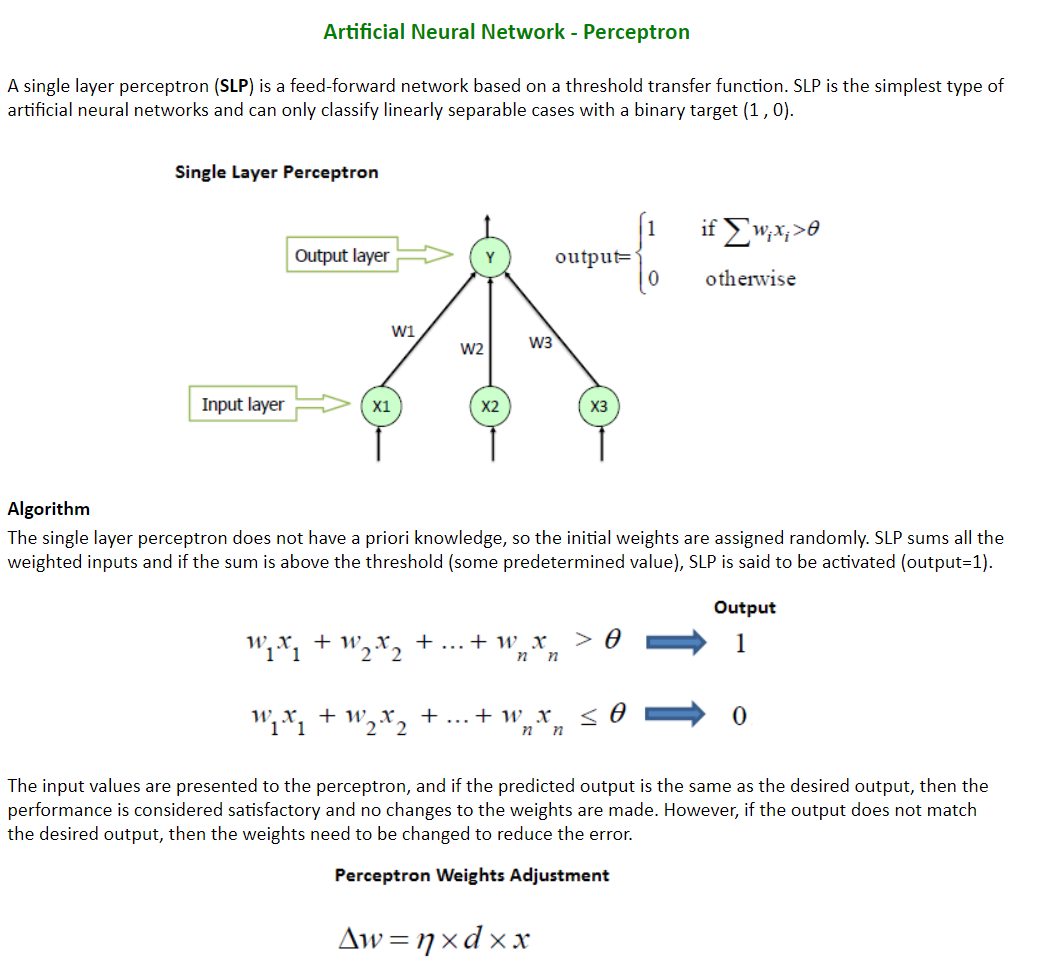

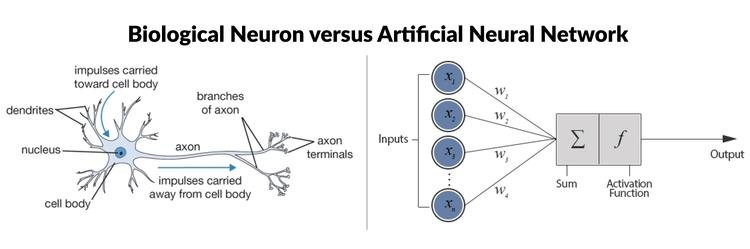

A perceptron is a basic unit in neural networks, mimicking brain neurons. It processes inputs with weighted connections and a bias, producing binary outputs through an activation function. Primarily used in binary classification tasks, perceptrons were instrumental in advancing neural network development and deep learning techniques.

main components:

1. Input Nodes
2. Weights and Bias
3. Activation Function

# Working of a perceptron
In the first step, all the input values are multiplied with their respective weights and added together. The result obtained is called weighted sum ∑wi*xi, or stated differently,  x1*w1 + x2*w2 +…wn*xn. This sum gives an appropriate representation of the inputs based on their importance. Additionally, a bias term b is added to this sum ∑wi*xi + b. Bias serves as another model parameter (in addition to weights) that can be tuned to improve the model’s performance.

In the second step, an activation function f is applied over the above sum ∑wi*xi + b to obtain output Y = f(∑wi*xi + b). Depending upon the scenario and the activation function used, the Output is either binary {1, 0} or a continuous value. 

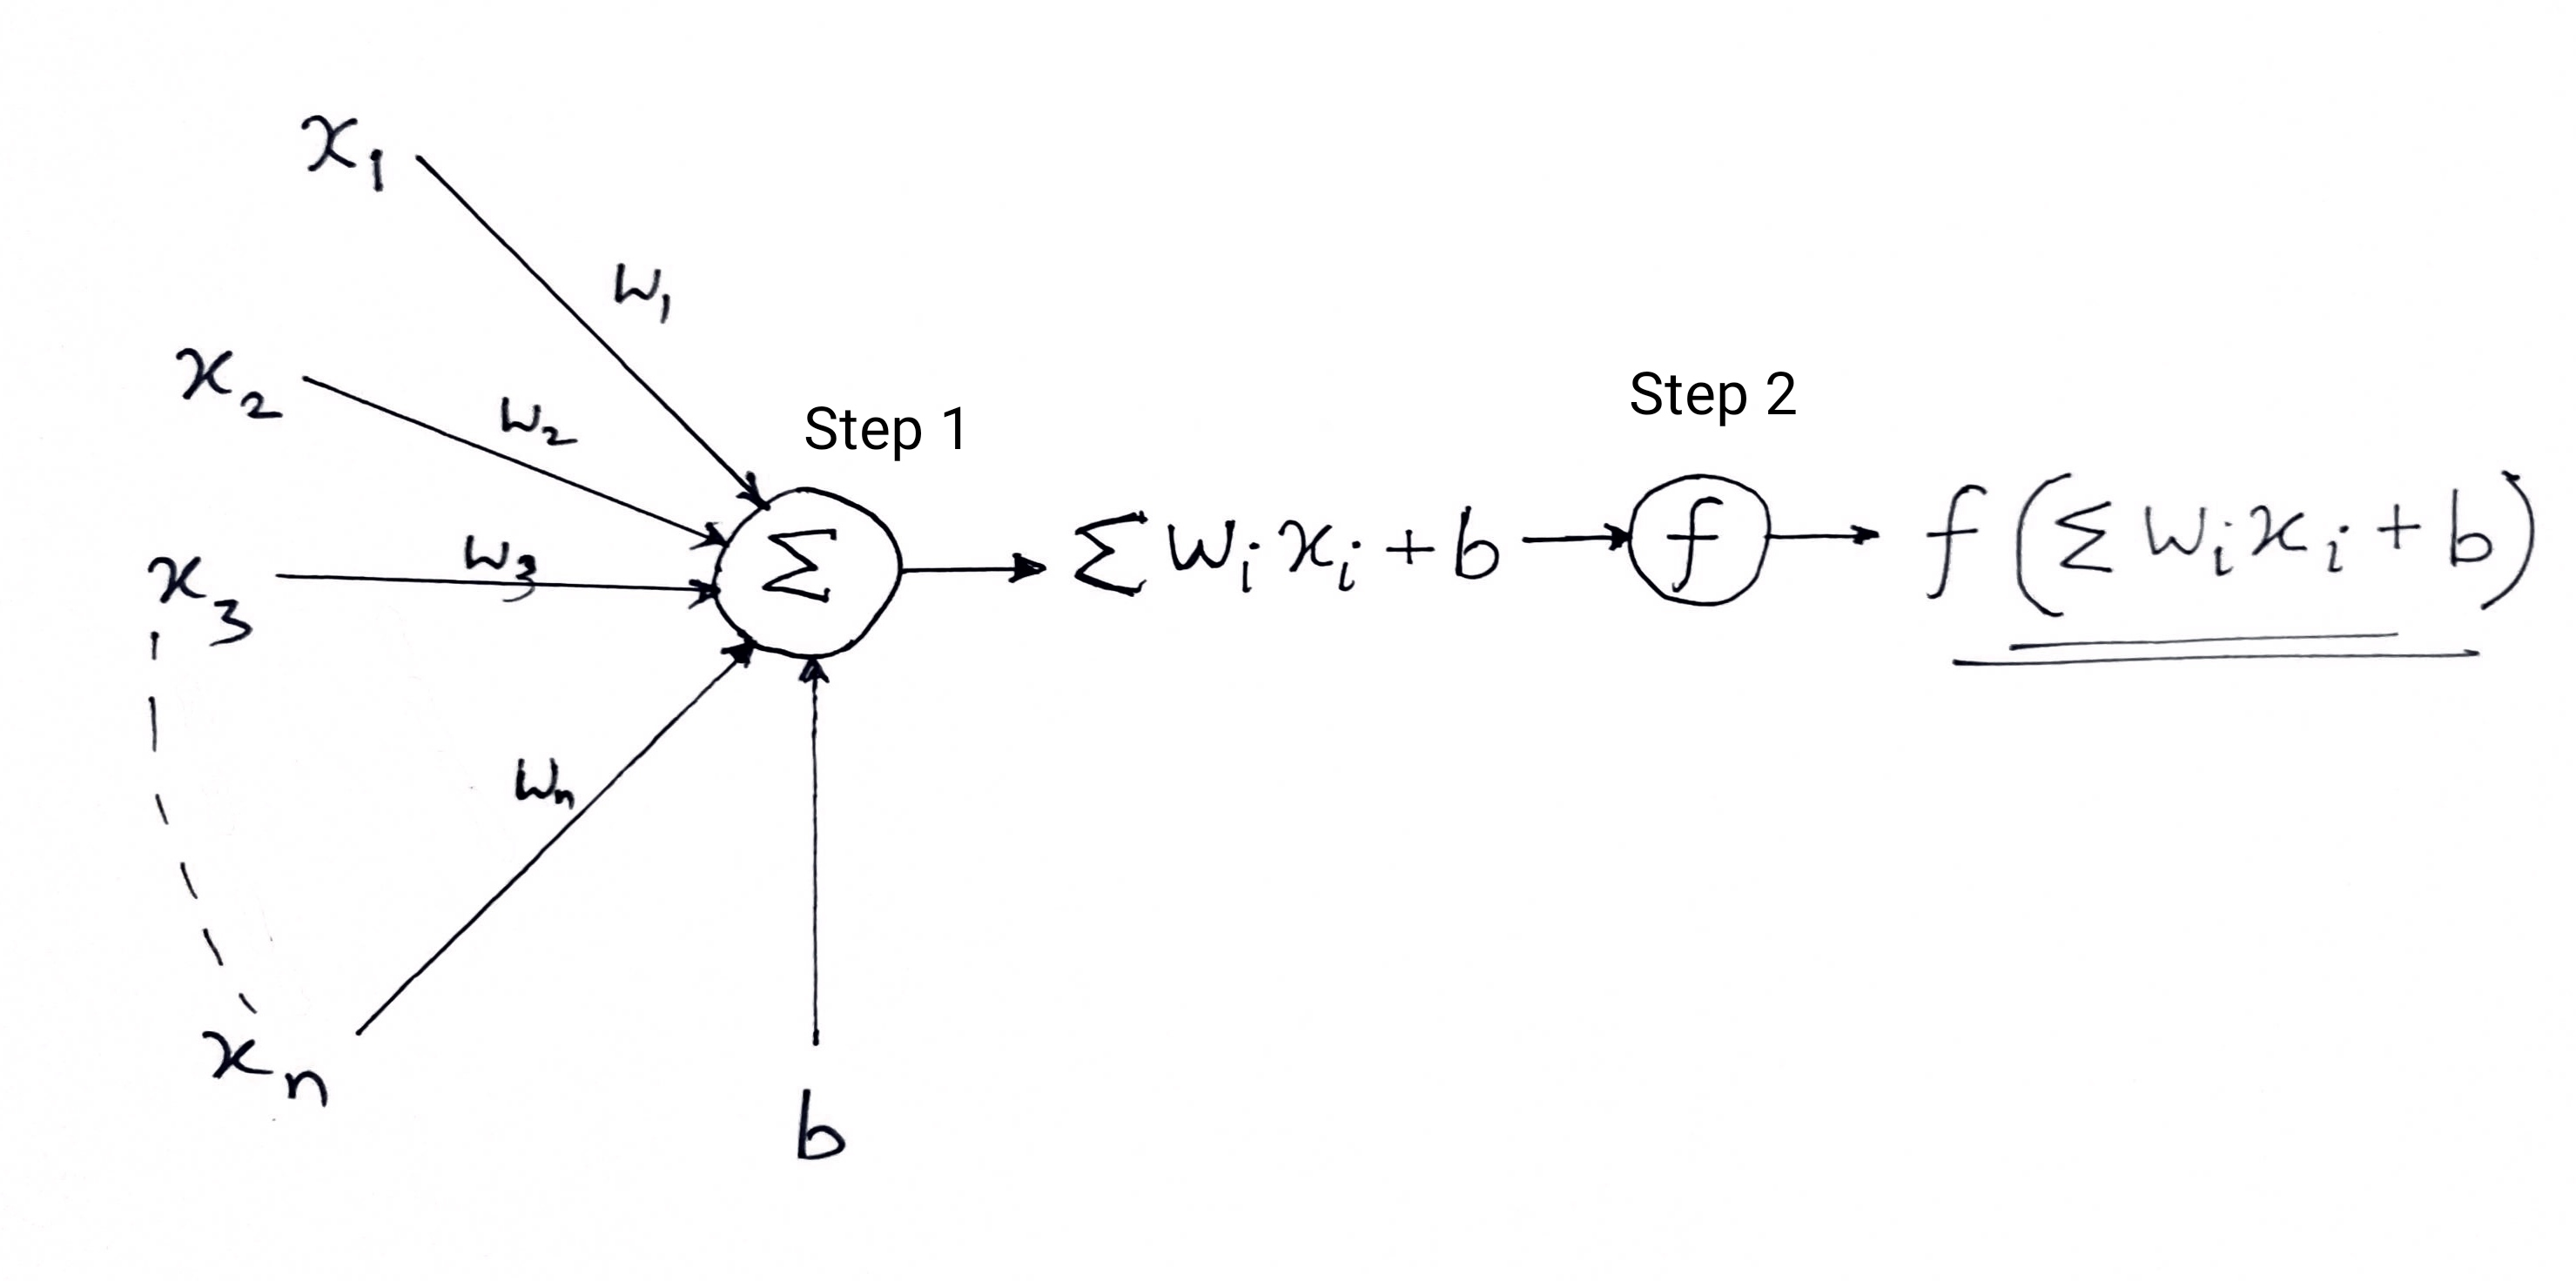

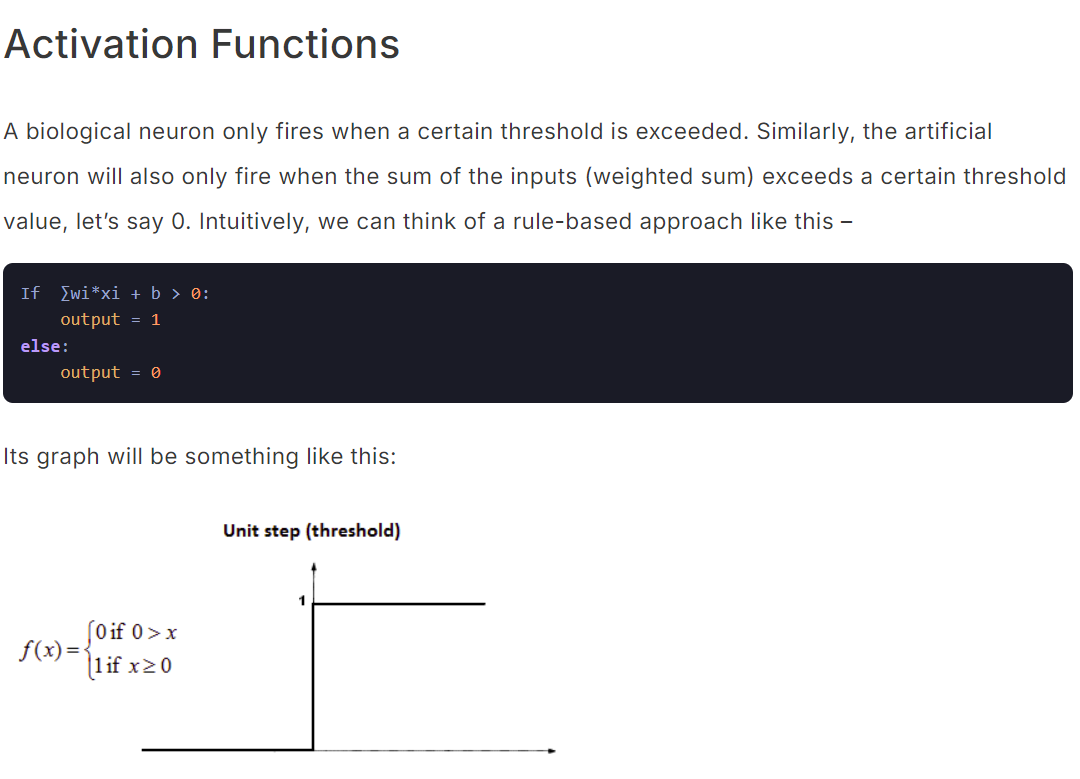

In [18]:
#Practical

In [75]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 

In [79]:
 #loading dataset  
data = load_iris() 

In [81]:
#Splitting the dataset to train data and test data 
X, y = data.data[:100, :], data.target[:100] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [83]:
#Making a perceptron classifier 
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42) 
perceptron.fit(X_train, y_train) 

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [85]:
#Making prediction on test data 
y_pred = perceptron.predict(X_test) 
#Finding accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy}') 

Accuracy: 1.0


In [87]:
# Classification

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

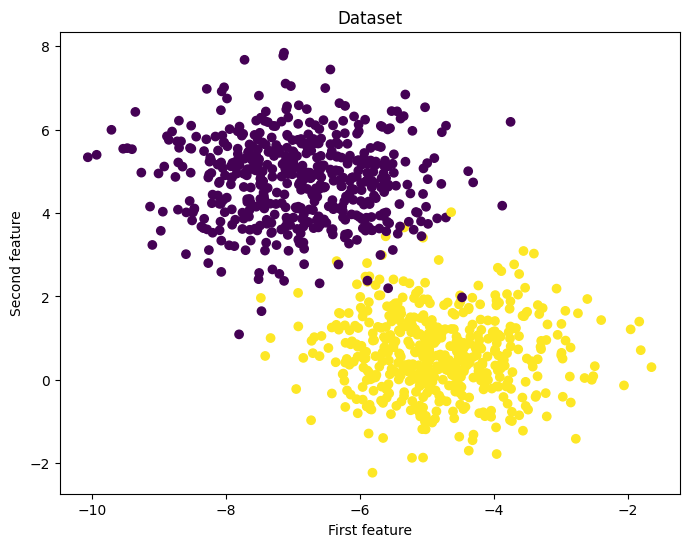

In [93]:
X, y = make_blobs(n_samples=1000, centers=2, random_state= 12)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [95]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [97]:
from sklearn.linear_model import Perceptron

In [99]:
pr = Perceptron(max_iter=1000,random_state=42)
pr.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=42)

In [109]:
pr.score(X_train, y_train),pr.score(X_test, y_test)

(0.9853333333333333, 0.976)

## Decision Boundary

In [113]:
from mlxtend.plotting import plot_decision_regions

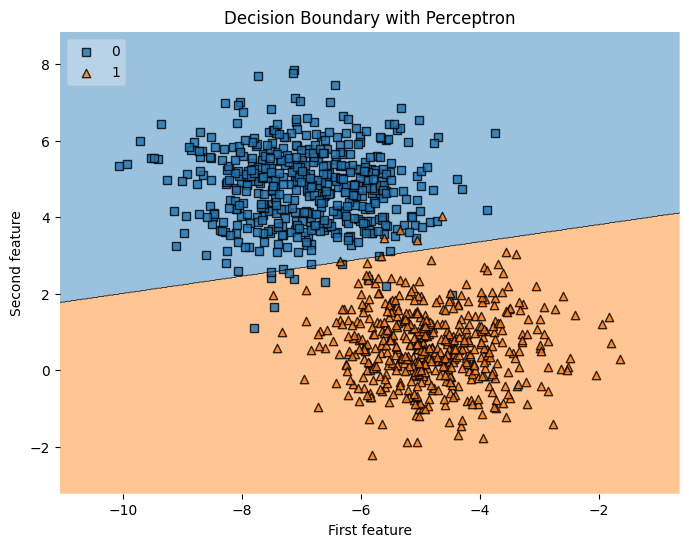

In [115]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X=X, y=y, clf=pr, legend=2)
plt.title("Decision Boundary with Perceptron")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [118]:
#For understanding

Perceptron model class
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

#Visualize decision boundary
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
plot_hyperplane(X, y, w_trained, b_trained)